## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = mouse_metadata.merge(study_results,how='left',on='Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(df['Mouse ID'].unique())

249

In [3]:
# Duplicated rows of Mouse ID based on Mouse ID and Timepoints that reoccur
df[df.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID']!='g989']

In [5]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# SEM = standard error of the mean

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stat = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard Deviation': std,
    'SEM': sem
})

summary_stat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stat = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg({'Mean':np.mean,
                                                            'Median':np.median,
                                                            'Variance':np.var,
                                                            'Standard Deviation':np.std,
                                                            'SEM':st.sem})
summary_stat

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Unique Mice Tested')

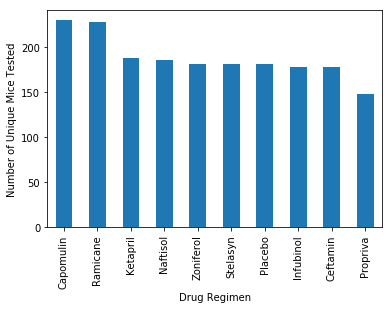

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_regimen = clean_df.groupby('Drug Regimen')
count_drug_regimen = drug_regimen['Drug Regimen'].count()

count_drug_regimen.sort_values(ascending=False).plot(kind='bar', sort_columns=True)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')


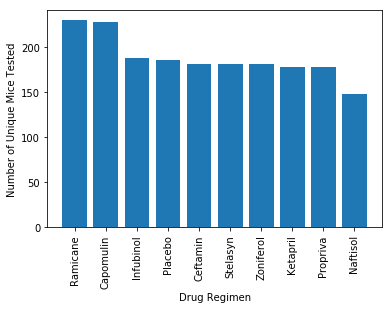

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_regimen = clean_df['Drug Regimen'].unique()
count_drug_regimen = clean_df.groupby('Drug Regimen', as_index=0).count().sort_values('Mouse ID',ascending=False)

plt.bar(x=drug_regimen, height=count_drug_regimen['Mouse ID'])
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
plt.show()


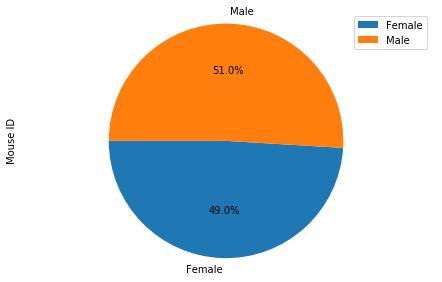

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_df.groupby(['Sex']).count().plot(kind='pie',y='Mouse ID',autopct='%1.1f%%', startangle=180)
plt.tight_layout()
plt.axis('equal');

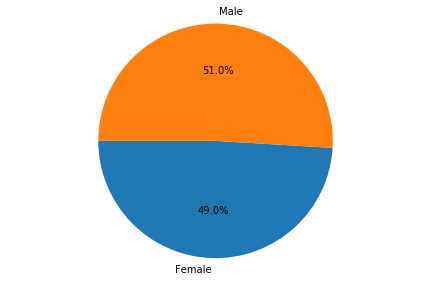

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_perct = list(clean_df['Sex'].value_counts().sort_values(ascending=True))
plt.pie(sex_perct, labels=['Female','Male'], autopct='%1.1f%%', startangle=180)
plt.tight_layout()
plt.axis('equal');

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_reg = clean_df.loc[clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']),:]
last_greatest_timepoint = four_reg.groupby('Mouse ID')['Timepoint'].max().to_frame().reset_index()
last_greatest_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_df.merge(last_greatest_timepoint,how='left',on='Mouse ID').head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45.0
1,k403,Ramicane,Male,21,16,5,38.825898,0,45.0
2,k403,Ramicane,Male,21,16,10,35.014271,1,45.0
3,k403,Ramicane,Male,21,16,15,34.223992,1,45.0
4,k403,Ramicane,Male,21,16,20,32.997729,1,45.0


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    temp = clean_df.loc[clean_df['Drug Regimen']==treatment, 'Tumor Volume (mm3)']
    quartiles = temp.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    IQR = upper_q - lower_q
    
    tumor_vol_data.append(list(temp))
    
    lower_bound = lower_q-(1.5*IQR)
    upper_bound = upper_q+(1.5*IQR)
    print(f'Values below {lower_bound} could be outliers for treatment', treatment)
    print(f'Values below {upper_bound} could be outliers for treatment', treatment, end='\n\n')

Values below 26.714832162499995 could be outliers for treatment Capomulin
Values below 55.9711007025 could be outliers for treatment Capomulin

Values below 24.18658646249998 could be outliers for treatment Ramicane
Values below 57.48804812250001 could be outliers for treatment Ramicane

Values below 32.309217298749985 could be outliers for treatment Infubinol
Values below 72.31757996875001 could be outliers for treatment Infubinol

Values below 32.818911426250004 could be outliers for treatment Ceftamin
Values below 71.19095325625 could be outliers for treatment Ceftamin



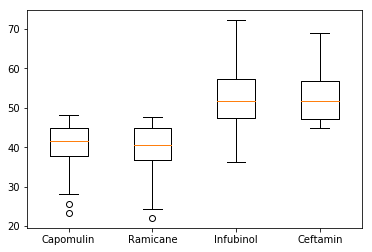

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
my_dict = {val[0]:val[1] for val in zip(treatments,tumor_vol_data)}
fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys());

## Line and Scatter Plots

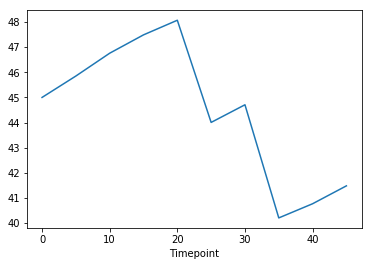

In [15]:
# Generate a line plot of time point versus tumor volume for A mouse treated with Capomulin
temp = clean_df.loc[(clean_df['Drug Regimen']=='Capomulin')&(clean_df['Mouse ID']=='l509'), ['Mouse ID','Timepoint','Tumor Volume (mm3)']]
plt.plot(temp['Timepoint'], temp['Tumor Volume (mm3)'])
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel('Timepoint (days)');


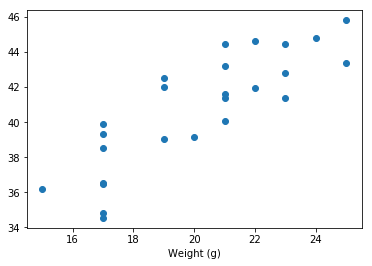

In [50]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
temp = clean_df.loc[clean_df['Drug Regimen']=='Capomulin', ['Mouse ID', 'Weight (g)','Tumor Volume (mm3)']]
avg_tumor_per_weight = temp.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_weight_per_mouse = temp.groupby('Mouse ID')['Weight (g)'].mean()

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(avg_weight_per_mouse, avg_tumor_per_weight);
plt.xlabel('Weight (g)');

## Correlation and Regression

In [ ]:
Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

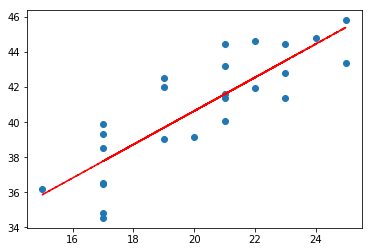

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
temp = clean_df.loc[clean_df['Drug Regimen']=='Capomulin', ['Mouse ID', 'Weight (g)','Tumor Volume (mm3)']]
x = temp.groupby('Mouse ID')['Weight (g)'].mean()
y = temp.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

correlation = st.pearsonr(x,y)
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x,y)
m_fit = m_slope*x+m_int

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(x,y)
plt.plot(x,m_fit,'--',color='r')
